In [1]:
import numpy as np

from tqdm import tqdm

In [2]:
letter_to_num = {}
letter_to_num['A'] = 0
letter_to_num['C'] = 1
letter_to_num['T'] = 2
letter_to_num['G'] = 3

In [3]:
num_to_letter = {}
num_to_letter[0] = 'A'
num_to_letter[1] = 'C'
num_to_letter[2] = 'T'
num_to_letter[3] = 'G'

In [4]:
def process_spacer(spacer):
    ans = np.zeros(32*4)
    
    for i, letter in enumerate(spacer):
        if letter in letter_to_num.keys():
            ans[i*4 + letter_to_num[letter]] = 1
    return ans
    

In [5]:
def to_array(spacers):
    X = np.zeros((len(spacers), 32 * 4))

    for i, spacer in tqdm(enumerate(spacers)):
        X[i,:] = process_spacer(spacer)
    return X

In [6]:
def to_array_pairs(pairs):
    X = np.zeros((len(pairs), 2, 32 * 4))

    for i, pair in tqdm(enumerate(pairs)):
        X[i,0,:] = process_spacer(pair[0][:32])
        X[i,1,:] = process_spacer(pair[1][:32])
    return X

In [246]:
with open("../data/ES/ES3_R1_spacers.txt") as f:
    lines1 = [x[:31] for x in f.readlines()[1:]]

In [175]:
with open("../data/SlO_10/SlO1_R2_spacers_10.txt") as f:
    lines2 = [x[:32] for x in f.readlines()[1:]]

In [176]:
X = to_array(lines1 + lines2)

325413it [00:05, 58452.29it/s]


In [177]:
X.shape

(325413, 128)

In [178]:
np.save("../data/npy/SlO", X)

#### ans 3

In [104]:
ans_3 = ["CAGCGTCAGGCGTGAAATCTCACCGTCGTTGC	TCGGTTCAGGCGTTGCAAACCTGGCTACCGGG	GTAGTCCATCATTCCACCTATGTCTGAACTCC	CCGGGGGATAATGTTTACGGTCATGCGCCCCC	TGGGCGGCTTGCCTTGCAGCCAGCTCCAGCAG	AAGCTGGCTGGCAATCTCTTTCGGGGTGAGTC	TAGTTTCCGTATCTCCGGATTTATAAAGCTGA	GCAGGCGGCGACGCGCAGGGTATGCGCGATTCG	GCGACCGCTCAGAAATTCCAGACCCGATCCAAA	TCAACATTATCAATTACAACCGACAGGGAGCC	AGCGTGTTCGGCATCACCTTTGGCTTCGGCTG	TGCGTGAGCGTATCGCCGCGCGTCTGCGAAAG",
"GACAGAACGGCCTCAGTAGTCTCGTCAGGCTC	CTGTTTTCGCAAATCTATGGACTATTGCTATT	GGGCGCACGGAATACAAAGCCGTGTATCTGCT	TGGCTCTGCAACAGCAGCACCCATGACCACGT	GAAATGCTGGTGAGCGTTAATGCCGCAAACAC	ATTACGCCTTTTTGCGATTGCCCGGTTTTTGC",
"GACAGAACGGCCTCAGTAGTCTCGTCAGGCTC	ACACGCCCTTATCAAATAGCTGTGATTTACCTA	ATAGACCCCGAACAACAATACGCGCAAACCGA	TACCGTACAGACTGCCGGATATTATTTTTTTG	CTGCTGCTCGAGCTGGTGGAGTGCTGCTATAG	AACGTCAGGTTGTCGCCGCTCTGCGTGGTCGC	TGCATGGCTTTGGCTTCCTCTTTGACGGACGC	ATATATCAGAGCAAAAAACAAAGCCACAGCCA	CATAAAGAAACTATTTTGCGTTTCGTTCAGGT	TTTTACAGTGTCAACAATCGTTCCCTGATTGT	CCGCCGTTGGCACCGTCAAACTCCGGTACTGT	TATAGAGATCGTTTTTGGAATTTACAGCGAGG	CCGTAAGTGGTTTGAGCGATGATATTTGTGCT",
"AGTGCTGGACCATTTCAAATTCACAATAGATT	GGAATGATATTTCAATAAATAATTATAACAAT	CCCTCACACCGATTCGCCAAACGGTGGAGAAG	AGCTGGGCGAAATTTTGATTCATCGTGATGAC"]

In [105]:
ans_3_31 = []
for seq in ans_3:
    for sp in seq.split("\t"):
        ans_3_31.append(sp[:31])

In [106]:
ans_3_31

['CAGCGTCAGGCGTGAAATCTCACCGTCGTTG',
 'TCGGTTCAGGCGTTGCAAACCTGGCTACCGG',
 'GTAGTCCATCATTCCACCTATGTCTGAACTC',
 'CCGGGGGATAATGTTTACGGTCATGCGCCCC',
 'TGGGCGGCTTGCCTTGCAGCCAGCTCCAGCA',
 'AAGCTGGCTGGCAATCTCTTTCGGGGTGAGT',
 'TAGTTTCCGTATCTCCGGATTTATAAAGCTG',
 'GCAGGCGGCGACGCGCAGGGTATGCGCGATT',
 'GCGACCGCTCAGAAATTCCAGACCCGATCCA',
 'TCAACATTATCAATTACAACCGACAGGGAGC',
 'AGCGTGTTCGGCATCACCTTTGGCTTCGGCT',
 'TGCGTGAGCGTATCGCCGCGCGTCTGCGAAA',
 'GACAGAACGGCCTCAGTAGTCTCGTCAGGCT',
 'CTGTTTTCGCAAATCTATGGACTATTGCTAT',
 'GGGCGCACGGAATACAAAGCCGTGTATCTGC',
 'TGGCTCTGCAACAGCAGCACCCATGACCACG',
 'GAAATGCTGGTGAGCGTTAATGCCGCAAACA',
 'ATTACGCCTTTTTGCGATTGCCCGGTTTTTG',
 'GACAGAACGGCCTCAGTAGTCTCGTCAGGCT',
 'ACACGCCCTTATCAAATAGCTGTGATTTACC',
 'ATAGACCCCGAACAACAATACGCGCAAACCG',
 'TACCGTACAGACTGCCGGATATTATTTTTTT',
 'CTGCTGCTCGAGCTGGTGGAGTGCTGCTATA',
 'AACGTCAGGTTGTCGCCGCTCTGCGTGGTCG',
 'TGCATGGCTTTGGCTTCCTCTTTGACGGACG',
 'ATATATCAGAGCAAAAAACAAAGCCACAGCC',
 'CATAAAGAAACTATTTTGCGTTTCGTTCAGG',
 'TTTTACAGTGTCAACAATCGTTCCCT

In [107]:
np.save("../data/npy/ES3_R1_ans_ez", to_array(ans_3_31))

35it [00:00, 18016.77it/s]


In [232]:
ans_3_array = [to_array([y[:31] for y in x.split("\t")]) for x in ans_3]

12it [00:00, 27746.22it/s]
6it [00:00, 22094.67it/s]
13it [00:00, 28295.77it/s]
4it [00:00, 18040.02it/s]


In [70]:
np.savez("./data/npy/ES3_R1_ans.npy", ans_3_array)

#### pairs 3

In [167]:
with open("../data/SlO_10/SlO1_R1_pairs_10.txt") as f:
    lines1 = [x[:-2].split(' ') for x in f.readlines()]

In [168]:
with open("../data/SlO_10/SlO1_R2_pairs_10.txt") as f:
    lines2 = [x[:-2].split(' ') for x in f.readlines()]

In [169]:
lines = lines1 + lines2

In [170]:
len(lines)

96357

In [171]:
X = to_array_pairs(lines)

96357it [00:03, 29787.87it/s]


In [172]:
X[0]

array([[ 0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.,  1.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  1.,
         0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,
         0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,
         0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,
         0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,
         0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,
         0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  1.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
         1.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0

In [173]:
np.save("../data/npy/SlO_pairs", X)

#### ans 1

In [11]:
K_1 = ['CAGCGTCAGGCGTGAAATCTCACCGTCGTTGC', 'TCGGTTCAGGCGTTGCAAACCTGGCTACCGGG', 
       'GTAGTCCATCATTCCACCTATGTCTGAACTCC', 'CCGGGGGATAATGTTTACGGTCATGCGCCCCC', 
       'TGGGCGGCTTGCCTTGCAGCCAGCTCCAGCAG', 'AAGCTGGCTGGCAATCTCTTTCGGGGTGAGTC',
       'TAGTTTCCGTATCTCCGGATTTATAAAGCTGA', 'GCAGGCGGCGACGCGCAGGGTATGCGCGATTCG', 
       'GCGACCGCTCAGAAATTCCAGACCCGATCCAAA','TCAACATTATCAATTACAACCGACAGGGAGCC', 
       'AGCGTGTTCGGCATCACCTTTGGCTTCGGCTG', 'TGCGTGAGCGTATCGCCGCGCGTCTGCGAAAG']
       
K_2 = ['GACAGAACGGCCTCAGTAGTCTCGTCAGGCTC', 'CTGTTTTCGCAAATCTATGGACTATTGCTATT', 
       'GGGCGCACGGAATACAAAGCCGTGTATCTGCT', 'TGGCTCTGCAACAGCAGCACCCATGACCACGT', 
       'GAAATGCTGGTGAGCGTTAATGCCGCAAACAC', 'ATTACGCCTTTTTGCGATTGCCCGGTTTTTGC']

In [23]:
X_ans = to_array([x[:32] for x in K_1 + K_2])

18it [00:00, 26287.42it/s]


In [24]:
np.save("./data/npy/ES1_R1_ans", X_ans)

#### db 

In [41]:
with open("./data/CRISPR_db_2109.txt") as f:
    lines = f.readlines()

In [46]:
lines_split = [[y for y in x.split("\t")[1:-1] if len(y) > 0] for x in lines] 

In [52]:
all_spacers = set()

In [53]:
for line in tqdm(lines_split):
    for sp in line:
        all_spacers.add(sp)

100%|██████████| 3058/3058 [00:00<00:00, 464094.57it/s]


In [58]:
db = [x[:32] for x in list(all_spacers)]

In [60]:
np.save("./data/npy/db", to_array(db))

1759it [00:00, 59841.84it/s]


# SAME

In [247]:
s = set(ans_3_31)

In [248]:
count = 0
for l in [x[:31] for x in lines1]:
    if l in s:
        count += 1

In [249]:
count

171756

In [250]:
len(lines1)

198255

#### How about some noise?

In [23]:
db = np.load("../data/npy/db.npy")

In [24]:
db.shape

(1759, 128)

In [7]:
noise_matrix_ES1 = np.load("../switch_probs_ES1.npy")

In [28]:
spacer_r = db[0].reshape(-1, 4)

In [31]:
np.where(spacer_r[0])[0][0]

3

In [97]:
x, y = np.where(db.reshape(-1, 32, 4).sum(2) == 0)

In [99]:
np.where(db.reshape(-1, 32, 4).sum(2) == 0)

(array([], dtype=int64), array([], dtype=int64))

In [91]:
(db.reshape(-1, 32, 4).sum(2) == 0)[13][31]

True

In [98]:
for i, j in zip(x, y):
    db[i][j * 4] = 1

In [45]:
def add_noize_arr(spacer, mat):
    spacer_r = spacer.reshape(-1, 4)
    spacer_n = np.zeros_like(spacer_r)
    for i, letter in enumerate(spacer_r):
        #print(letter)
        #print(np.where(letter)[0])
        probs = mat[np.where(letter)[0][0]]
        
        letter_n = np.random.choice([0,1,2,3], p=probs)
    
        spacer_n[i][letter_n] = 1

    #print(changes)
    return spacer_n.flatten()

In [8]:
def add_noize(spacer, mat):
    changes = 0
    noized = []
    for letter in spacer: 
        probs = mat[letter_to_num[letter]]
        
        letter_n = np.random.choice(["A","C","T","G"], p=probs)
        if letter != letter_n:
            changes += 1
            #print(letter, letter_n)
        noized.append(letter_n)

    #print(changes)
    return ''.join(noized)

In [9]:
noise_matrix_ES1[0].sum()

1.0

In [76]:
%timeit add_noize_arr(db[0], noise_matrix_ES1)


1.81 ms ± 47 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [207]:
noise_matrix_ES1

array([[  9.97794183e-01,   1.94532712e-04,   2.43792069e-04,
          1.76749250e-03],
       [  1.07435481e-04,   9.99195923e-01,   6.22314958e-04,
          7.43264336e-05],
       [  2.57768403e-04,   1.78670327e-03,   9.97787611e-01,
          1.67917703e-04],
       [  5.78425309e-04,   8.16095114e-05,   1.05949190e-04,
          9.99234016e-01]])

In [112]:
num = 500000

In [113]:
noized_lines = np.zeros((num, 128))
originals = np.zeros((num, 128))

c = 0
while c < num:
    for sp in tqdm(db):
        noised = add_noize_arr(sp, noise_matrix_ES1)
        #if any(noised != sp):
        noized_lines[c] = noised
        originals[c] = sp
        c += 1
        if c >= num:
            break
    print(c)

  3%|▎         | 50/1759 [00:00<00:03, 499.04it/s]

1759


  3%|▎         | 50/1759 [00:00<00:03, 492.93it/s]

3518


  3%|▎         | 52/1759 [00:00<00:03, 516.32it/s]

5277


  3%|▎         | 52/1759 [00:00<00:03, 512.82it/s]

7036


  3%|▎         | 50/1759 [00:00<00:03, 496.35it/s]

8795


  3%|▎         | 51/1759 [00:00<00:03, 504.66it/s]

10554


  3%|▎         | 52/1759 [00:00<00:03, 511.72it/s]

12313


  3%|▎         | 51/1759 [00:00<00:03, 503.20it/s]

14072


  3%|▎         | 51/1759 [00:00<00:03, 505.11it/s]

15831


  3%|▎         | 52/1759 [00:00<00:03, 515.67it/s]

17590


  3%|▎         | 49/1759 [00:00<00:03, 489.86it/s]

19349


  3%|▎         | 53/1759 [00:00<00:03, 528.09it/s]

21108


  3%|▎         | 44/1759 [00:00<00:03, 436.79it/s]

22867


  3%|▎         | 49/1759 [00:00<00:03, 485.65it/s]

24626


  3%|▎         | 52/1759 [00:00<00:03, 518.00it/s]

26385


  3%|▎         | 52/1759 [00:00<00:03, 519.33it/s]

28144


  3%|▎         | 52/1759 [00:00<00:03, 515.44it/s]

29903


  3%|▎         | 52/1759 [00:00<00:03, 517.61it/s]

31662


  3%|▎         | 52/1759 [00:00<00:03, 518.53it/s]

33421


  3%|▎         | 52/1759 [00:00<00:03, 518.12it/s]

35180


  3%|▎         | 53/1759 [00:00<00:03, 524.86it/s]

36939


  3%|▎         | 50/1759 [00:00<00:03, 493.82it/s]

38698


  3%|▎         | 52/1759 [00:00<00:03, 518.20it/s]

40457


  3%|▎         | 53/1759 [00:00<00:03, 521.13it/s]

42216


  3%|▎         | 51/1759 [00:00<00:03, 508.44it/s]

43975


  3%|▎         | 52/1759 [00:00<00:03, 518.54it/s]

45734


  3%|▎         | 48/1759 [00:00<00:03, 474.79it/s]

47493


  3%|▎         | 47/1759 [00:00<00:03, 468.57it/s]

49252


  3%|▎         | 51/1759 [00:00<00:03, 507.70it/s]

51011


  3%|▎         | 53/1759 [00:00<00:03, 520.62it/s]

52770


  3%|▎         | 51/1759 [00:00<00:03, 508.36it/s]

54529


  3%|▎         | 52/1759 [00:00<00:03, 513.40it/s]

56288


  3%|▎         | 51/1759 [00:00<00:03, 508.54it/s]

58047


  3%|▎         | 53/1759 [00:00<00:03, 525.15it/s]

59806


  3%|▎         | 52/1759 [00:00<00:03, 511.33it/s]

61565


  3%|▎         | 53/1759 [00:00<00:03, 521.63it/s]

63324


  3%|▎         | 51/1759 [00:00<00:03, 504.00it/s]

65083


  3%|▎         | 51/1759 [00:00<00:03, 501.68it/s]

66842


  3%|▎         | 49/1759 [00:00<00:03, 485.71it/s]

68601


  3%|▎         | 52/1759 [00:00<00:03, 514.58it/s]

70360


  3%|▎         | 47/1759 [00:00<00:03, 466.59it/s]

72119


  3%|▎         | 51/1759 [00:00<00:03, 502.32it/s]

73878


  3%|▎         | 51/1759 [00:00<00:03, 502.11it/s]

75637


  3%|▎         | 53/1759 [00:00<00:03, 523.77it/s]

77396


  3%|▎         | 52/1759 [00:00<00:03, 518.85it/s]

79155


  3%|▎         | 52/1759 [00:00<00:03, 512.93it/s]

80914


  3%|▎         | 51/1759 [00:00<00:03, 502.75it/s]

82673


  3%|▎         | 53/1759 [00:00<00:03, 526.16it/s]

84432


  3%|▎         | 53/1759 [00:00<00:03, 527.22it/s]

86191


  3%|▎         | 52/1759 [00:00<00:03, 514.89it/s]

87950


  3%|▎         | 51/1759 [00:00<00:03, 505.04it/s]

89709


  3%|▎         | 52/1759 [00:00<00:03, 516.41it/s]

91468


  3%|▎         | 53/1759 [00:00<00:03, 524.61it/s]

93227


  3%|▎         | 48/1759 [00:00<00:03, 477.78it/s]

94986


  3%|▎         | 52/1759 [00:00<00:03, 519.73it/s]

96745


  3%|▎         | 53/1759 [00:00<00:03, 525.98it/s]

98504


  3%|▎         | 52/1759 [00:00<00:03, 518.04it/s]

100263


  3%|▎         | 51/1759 [00:00<00:03, 508.19it/s]

102022


  3%|▎         | 48/1759 [00:00<00:03, 477.19it/s]

103781


  3%|▎         | 51/1759 [00:00<00:03, 509.71it/s]

105540


  3%|▎         | 47/1759 [00:00<00:03, 465.86it/s]

107299


  3%|▎         | 53/1759 [00:00<00:03, 522.70it/s]

109058


  3%|▎         | 51/1759 [00:00<00:03, 509.52it/s]

110817


  3%|▎         | 50/1759 [00:00<00:03, 492.98it/s]

112576


  3%|▎         | 50/1759 [00:00<00:03, 499.30it/s]

114335


  3%|▎         | 52/1759 [00:00<00:03, 511.11it/s]

116094


  3%|▎         | 53/1759 [00:00<00:03, 520.41it/s]

117853


  3%|▎         | 49/1759 [00:00<00:03, 478.97it/s]

119612


  3%|▎         | 51/1759 [00:00<00:03, 504.34it/s]

121371


  2%|▏         | 39/1759 [00:00<00:04, 385.26it/s]

123130


  3%|▎         | 50/1759 [00:00<00:03, 493.12it/s]

124889


  3%|▎         | 52/1759 [00:00<00:03, 516.10it/s]

126648


  3%|▎         | 47/1759 [00:00<00:03, 467.82it/s]

128407


  3%|▎         | 51/1759 [00:00<00:03, 500.84it/s]

130166


  2%|▏         | 41/1759 [00:00<00:04, 408.87it/s]

131925


  3%|▎         | 49/1759 [00:00<00:03, 482.92it/s]

133684


  3%|▎         | 52/1759 [00:00<00:03, 514.32it/s]

135443


  3%|▎         | 53/1759 [00:00<00:03, 527.76it/s]

137202


  3%|▎         | 47/1759 [00:00<00:03, 462.70it/s]

138961


  3%|▎         | 51/1759 [00:00<00:03, 505.27it/s]

140720


  3%|▎         | 53/1759 [00:00<00:03, 523.22it/s]

142479


  3%|▎         | 51/1759 [00:00<00:03, 503.47it/s]

144238


  3%|▎         | 53/1759 [00:00<00:03, 520.62it/s]

145997


  3%|▎         | 52/1759 [00:00<00:03, 515.59it/s]

147756


  3%|▎         | 52/1759 [00:00<00:03, 513.99it/s]

149515


  3%|▎         | 51/1759 [00:00<00:03, 503.92it/s]

151274


  3%|▎         | 50/1759 [00:00<00:03, 498.85it/s]

153033


  3%|▎         | 50/1759 [00:00<00:03, 493.71it/s]

154792


  3%|▎         | 52/1759 [00:00<00:03, 513.05it/s]

156551


  3%|▎         | 51/1759 [00:00<00:03, 502.44it/s]

158310


  3%|▎         | 49/1759 [00:00<00:03, 488.99it/s]

160069


  3%|▎         | 47/1759 [00:00<00:03, 463.35it/s]

161828


  3%|▎         | 51/1759 [00:00<00:03, 505.66it/s]

163587


  3%|▎         | 52/1759 [00:00<00:03, 517.52it/s]

165346


  3%|▎         | 51/1759 [00:00<00:03, 506.98it/s]

167105


  3%|▎         | 52/1759 [00:00<00:03, 516.84it/s]

168864


  3%|▎         | 50/1759 [00:00<00:03, 499.59it/s]

170623


  3%|▎         | 52/1759 [00:00<00:03, 512.02it/s]

172382


  3%|▎         | 52/1759 [00:00<00:03, 518.11it/s]

174141


  3%|▎         | 51/1759 [00:00<00:03, 508.84it/s]

175900


  3%|▎         | 51/1759 [00:00<00:03, 509.42it/s]

177659


  3%|▎         | 47/1759 [00:00<00:03, 469.60it/s]

179418


  3%|▎         | 50/1759 [00:00<00:03, 493.05it/s]

181177


  3%|▎         | 51/1759 [00:00<00:03, 509.15it/s]

182936


  3%|▎         | 47/1759 [00:00<00:03, 469.40it/s]

184695


  3%|▎         | 45/1759 [00:00<00:03, 440.29it/s]

186454


  3%|▎         | 46/1759 [00:00<00:03, 452.33it/s]

188213


  3%|▎         | 44/1759 [00:00<00:03, 433.92it/s]

189972


  3%|▎         | 47/1759 [00:00<00:03, 464.75it/s]

191731


  3%|▎         | 49/1759 [00:00<00:03, 479.07it/s]

193490


  3%|▎         | 45/1759 [00:00<00:03, 441.26it/s]

195249


  3%|▎         | 45/1759 [00:00<00:03, 447.34it/s]

197008


  3%|▎         | 50/1759 [00:00<00:03, 494.84it/s]

198767


  3%|▎         | 50/1759 [00:00<00:03, 491.68it/s]

200526


  3%|▎         | 48/1759 [00:00<00:03, 474.13it/s]

202285


  3%|▎         | 48/1759 [00:00<00:03, 479.13it/s]

204044


  3%|▎         | 46/1759 [00:00<00:03, 459.37it/s]

205803


  3%|▎         | 47/1759 [00:00<00:03, 463.72it/s]

207562


  3%|▎         | 53/1759 [00:00<00:03, 524.43it/s]

209321


  3%|▎         | 52/1759 [00:00<00:03, 513.55it/s]

211080


  3%|▎         | 50/1759 [00:00<00:03, 492.10it/s]

212839


  3%|▎         | 54/1759 [00:00<00:03, 532.90it/s]

214598


  3%|▎         | 51/1759 [00:00<00:03, 504.11it/s]

216357


  3%|▎         | 48/1759 [00:00<00:03, 474.66it/s]

218116


  2%|▏         | 41/1759 [00:00<00:04, 406.67it/s]

219875


  3%|▎         | 51/1759 [00:00<00:03, 508.65it/s]

221634


  3%|▎         | 53/1759 [00:00<00:03, 525.77it/s]

223393


  3%|▎         | 51/1759 [00:00<00:03, 508.22it/s]

225152


  3%|▎         | 52/1759 [00:00<00:03, 518.13it/s]

226911


  3%|▎         | 49/1759 [00:00<00:03, 481.01it/s]

228670


  3%|▎         | 53/1759 [00:00<00:03, 524.89it/s]

230429


  3%|▎         | 53/1759 [00:00<00:03, 523.11it/s]

232188


  3%|▎         | 52/1759 [00:00<00:03, 516.69it/s]

233947


  3%|▎         | 53/1759 [00:00<00:03, 526.71it/s]

235706


  3%|▎         | 52/1759 [00:00<00:03, 513.57it/s]

237465


  3%|▎         | 49/1759 [00:00<00:03, 482.05it/s]

239224


  3%|▎         | 52/1759 [00:00<00:03, 510.76it/s]

240983


  3%|▎         | 51/1759 [00:00<00:03, 505.18it/s]

242742


  3%|▎         | 51/1759 [00:00<00:03, 507.16it/s]

244501


  3%|▎         | 50/1759 [00:00<00:03, 496.58it/s]

246260


  3%|▎         | 51/1759 [00:00<00:03, 505.90it/s]

248019


  3%|▎         | 53/1759 [00:00<00:03, 528.57it/s]

249778


  3%|▎         | 51/1759 [00:00<00:03, 504.23it/s]

251537


  3%|▎         | 52/1759 [00:00<00:03, 515.47it/s]

253296


  3%|▎         | 52/1759 [00:00<00:03, 510.84it/s]

255055


  3%|▎         | 51/1759 [00:00<00:03, 505.63it/s]

256814


  3%|▎         | 52/1759 [00:00<00:03, 514.58it/s]

258573


  3%|▎         | 52/1759 [00:00<00:03, 513.34it/s]

260332


  3%|▎         | 53/1759 [00:00<00:03, 526.21it/s]

262091


  3%|▎         | 53/1759 [00:00<00:03, 524.16it/s]

263850


  3%|▎         | 53/1759 [00:00<00:03, 523.19it/s]

265609


  3%|▎         | 53/1759 [00:00<00:03, 524.41it/s]

267368


  3%|▎         | 52/1759 [00:00<00:03, 517.71it/s]

269127


  3%|▎         | 53/1759 [00:00<00:03, 520.23it/s]

270886


  3%|▎         | 52/1759 [00:00<00:03, 518.31it/s]

272645


  3%|▎         | 53/1759 [00:00<00:03, 528.29it/s]

274404


  3%|▎         | 53/1759 [00:00<00:03, 524.07it/s]

276163


  3%|▎         | 53/1759 [00:00<00:03, 527.33it/s]

277922


  3%|▎         | 52/1759 [00:00<00:03, 517.31it/s]

279681


  3%|▎         | 52/1759 [00:00<00:03, 518.35it/s]

281440


  3%|▎         | 52/1759 [00:00<00:03, 511.57it/s]

283199


  3%|▎         | 53/1759 [00:00<00:03, 520.48it/s]

284958


  3%|▎         | 53/1759 [00:00<00:03, 527.09it/s]

286717


  3%|▎         | 53/1759 [00:00<00:03, 527.29it/s]

288476


  3%|▎         | 53/1759 [00:00<00:03, 526.10it/s]

290235


  2%|▏         | 41/1759 [00:00<00:04, 406.33it/s]

291994


  3%|▎         | 50/1759 [00:00<00:03, 496.14it/s]

293753


  3%|▎         | 52/1759 [00:00<00:03, 510.91it/s]

295512


  3%|▎         | 51/1759 [00:00<00:03, 504.27it/s]

297271


  3%|▎         | 52/1759 [00:00<00:03, 517.51it/s]

299030


  3%|▎         | 51/1759 [00:00<00:03, 503.35it/s]

300789


  3%|▎         | 52/1759 [00:00<00:03, 513.09it/s]

302548


  3%|▎         | 52/1759 [00:00<00:03, 514.29it/s]

304307


  3%|▎         | 51/1759 [00:00<00:03, 504.84it/s]

306066


  3%|▎         | 52/1759 [00:00<00:03, 511.73it/s]

307825


  3%|▎         | 50/1759 [00:00<00:03, 491.11it/s]

309584


  3%|▎         | 53/1759 [00:00<00:03, 521.21it/s]

311343


  3%|▎         | 52/1759 [00:00<00:03, 518.21it/s]

313102


  3%|▎         | 52/1759 [00:00<00:03, 511.61it/s]

314861


  3%|▎         | 45/1759 [00:00<00:03, 447.93it/s]

316620


  3%|▎         | 51/1759 [00:00<00:03, 508.48it/s]

318379


  3%|▎         | 52/1759 [00:00<00:03, 511.79it/s]

320138


  3%|▎         | 50/1759 [00:00<00:03, 487.58it/s]

321897


  3%|▎         | 52/1759 [00:00<00:03, 518.63it/s]

323656


  3%|▎         | 51/1759 [00:00<00:03, 501.68it/s]

325415


  3%|▎         | 49/1759 [00:00<00:03, 482.66it/s]

327174


  3%|▎         | 52/1759 [00:00<00:03, 510.92it/s]

328933


  3%|▎         | 52/1759 [00:00<00:03, 516.98it/s]

330692


  3%|▎         | 52/1759 [00:00<00:03, 517.26it/s]

332451


  3%|▎         | 52/1759 [00:00<00:03, 517.44it/s]

334210


  3%|▎         | 51/1759 [00:00<00:03, 508.35it/s]

335969


  3%|▎         | 52/1759 [00:00<00:03, 517.32it/s]

337728


  3%|▎         | 53/1759 [00:00<00:03, 520.92it/s]

339487


  3%|▎         | 53/1759 [00:00<00:03, 522.56it/s]

341246


  3%|▎         | 50/1759 [00:00<00:03, 496.49it/s]

343005


  3%|▎         | 53/1759 [00:00<00:03, 525.57it/s]

344764


  3%|▎         | 52/1759 [00:00<00:03, 511.02it/s]

346523


  3%|▎         | 49/1759 [00:00<00:03, 483.01it/s]

348282


  3%|▎         | 52/1759 [00:00<00:03, 512.64it/s]

350041


  3%|▎         | 53/1759 [00:00<00:03, 522.01it/s]

351800


  3%|▎         | 52/1759 [00:00<00:03, 519.50it/s]

353559


  3%|▎         | 50/1759 [00:00<00:03, 496.47it/s]

355318


  3%|▎         | 50/1759 [00:00<00:03, 494.87it/s]

357077


  3%|▎         | 52/1759 [00:00<00:03, 511.42it/s]

358836


  3%|▎         | 46/1759 [00:00<00:03, 459.66it/s]

360595


  3%|▎         | 50/1759 [00:00<00:03, 499.83it/s]

362354


  3%|▎         | 53/1759 [00:00<00:03, 522.61it/s]

364113


  3%|▎         | 53/1759 [00:00<00:03, 528.11it/s]

365872


  3%|▎         | 52/1759 [00:00<00:03, 515.01it/s]

367631


  3%|▎         | 52/1759 [00:00<00:03, 512.96it/s]

369390


  3%|▎         | 52/1759 [00:00<00:03, 513.90it/s]

371149


  3%|▎         | 53/1759 [00:00<00:03, 525.91it/s]

372908


  3%|▎         | 52/1759 [00:00<00:03, 515.75it/s]

374667


  3%|▎         | 53/1759 [00:00<00:03, 528.79it/s]

376426


  3%|▎         | 53/1759 [00:00<00:03, 528.96it/s]

378185


  3%|▎         | 52/1759 [00:00<00:03, 519.21it/s]

379944


  3%|▎         | 52/1759 [00:00<00:03, 517.78it/s]

381703


  3%|▎         | 52/1759 [00:00<00:03, 518.70it/s]

383462


  3%|▎         | 53/1759 [00:00<00:03, 521.70it/s]

385221


  3%|▎         | 52/1759 [00:00<00:03, 516.56it/s]

386980


  3%|▎         | 51/1759 [00:00<00:03, 500.23it/s]

388739


  3%|▎         | 53/1759 [00:00<00:03, 515.39it/s]

390498


  3%|▎         | 49/1759 [00:00<00:03, 485.25it/s]

392257


  3%|▎         | 44/1759 [00:00<00:03, 433.66it/s]

394016


  3%|▎         | 51/1759 [00:00<00:03, 503.16it/s]

395775


  3%|▎         | 52/1759 [00:00<00:03, 514.10it/s]

397534


  3%|▎         | 51/1759 [00:00<00:03, 506.53it/s]

399293


  3%|▎         | 51/1759 [00:00<00:03, 502.48it/s]

401052


  3%|▎         | 53/1759 [00:00<00:03, 521.82it/s]

402811


  3%|▎         | 51/1759 [00:00<00:03, 503.66it/s]

404570


  3%|▎         | 51/1759 [00:00<00:03, 508.31it/s]

406329


  3%|▎         | 52/1759 [00:00<00:03, 511.30it/s]

408088


  3%|▎         | 51/1759 [00:00<00:03, 509.42it/s]

409847


  3%|▎         | 53/1759 [00:00<00:03, 522.64it/s]

411606


  3%|▎         | 51/1759 [00:00<00:03, 509.71it/s]

413365


  3%|▎         | 47/1759 [00:00<00:03, 465.39it/s]

415124


  3%|▎         | 52/1759 [00:00<00:03, 519.18it/s]

416883


  3%|▎         | 47/1759 [00:00<00:03, 464.92it/s]

418642


  3%|▎         | 50/1759 [00:00<00:03, 499.57it/s]

420401


  3%|▎         | 48/1759 [00:00<00:03, 473.92it/s]

422160


  3%|▎         | 52/1759 [00:00<00:03, 512.15it/s]

423919


  3%|▎         | 50/1759 [00:00<00:03, 496.31it/s]

425678


  2%|▏         | 42/1759 [00:00<00:04, 410.40it/s]

427437


  3%|▎         | 52/1759 [00:00<00:03, 515.59it/s]

429196


  3%|▎         | 52/1759 [00:00<00:03, 515.14it/s]

430955


  3%|▎         | 50/1759 [00:00<00:03, 498.98it/s]

432714


  3%|▎         | 53/1759 [00:00<00:03, 523.20it/s]

434473


  3%|▎         | 51/1759 [00:00<00:03, 502.85it/s]

436232


  3%|▎         | 50/1759 [00:00<00:03, 499.40it/s]

437991


  3%|▎         | 53/1759 [00:00<00:03, 522.94it/s]

439750


  3%|▎         | 52/1759 [00:00<00:03, 510.65it/s]

441509


  3%|▎         | 53/1759 [00:00<00:03, 524.97it/s]

443268


  3%|▎         | 51/1759 [00:00<00:03, 508.36it/s]

445027


  3%|▎         | 53/1759 [00:00<00:03, 529.67it/s]

446786


  3%|▎         | 53/1759 [00:00<00:03, 525.96it/s]

448545


  3%|▎         | 51/1759 [00:00<00:03, 505.78it/s]

450304


  3%|▎         | 52/1759 [00:00<00:03, 518.41it/s]

452063


  3%|▎         | 50/1759 [00:00<00:03, 495.62it/s]

453822


  3%|▎         | 53/1759 [00:00<00:03, 521.10it/s]

455581


  3%|▎         | 51/1759 [00:00<00:03, 505.97it/s]

457340


  3%|▎         | 51/1759 [00:00<00:03, 508.11it/s]

459099


  3%|▎         | 48/1759 [00:00<00:03, 475.56it/s]

460858


  3%|▎         | 50/1759 [00:00<00:03, 493.01it/s]

462617


  3%|▎         | 52/1759 [00:00<00:03, 516.27it/s]

464376


  3%|▎         | 49/1759 [00:00<00:03, 488.23it/s]

466135


  3%|▎         | 53/1759 [00:00<00:03, 528.51it/s]

467894


  3%|▎         | 51/1759 [00:00<00:03, 509.22it/s]

469653


  2%|▏         | 40/1759 [00:00<00:04, 399.62it/s]

471412


  3%|▎         | 51/1759 [00:00<00:03, 506.61it/s]

473171


  3%|▎         | 52/1759 [00:00<00:03, 513.53it/s]

474930


  3%|▎         | 52/1759 [00:00<00:03, 514.74it/s]

476689


  3%|▎         | 51/1759 [00:00<00:03, 509.00it/s]

478448


  3%|▎         | 51/1759 [00:00<00:03, 505.00it/s]

480207


  3%|▎         | 52/1759 [00:00<00:03, 518.59it/s]

481966


  3%|▎         | 47/1759 [00:00<00:03, 462.19it/s]

483725


  3%|▎         | 50/1759 [00:00<00:03, 496.94it/s]

485484


  3%|▎         | 48/1759 [00:00<00:03, 476.94it/s]

487243


  3%|▎         | 53/1759 [00:00<00:03, 520.49it/s]

489002


  3%|▎         | 47/1759 [00:00<00:03, 462.45it/s]

490761


  3%|▎         | 52/1759 [00:00<00:03, 514.41it/s]

492520


  3%|▎         | 49/1759 [00:00<00:03, 482.63it/s]

494279


  3%|▎         | 53/1759 [00:00<00:03, 523.95it/s]

496038


  3%|▎         | 53/1759 [00:00<00:03, 522.30it/s]

497797


  3%|▎         | 53/1759 [00:00<00:03, 528.24it/s]

499556


 24%|██▍       | 419/1759 [00:00<00:02, 519.87it/s]

500000


In [114]:
np.save("../data/npy/db_noised_AE_500k", noized_lines)
np.save("../data/npy/db_originals_AE_500k", originals)

In [18]:
len(noized_lines)

811

In [255]:
ans_3_split[2] + ans_3_split[3]

['GACAGAACGGCCTCAGTAGTCTCGTCAGGCTC',
 'ACACGCCCTTATCAAATAGCTGTGATTTACCTA',
 'ATAGACCCCGAACAACAATACGCGCAAACCGA',
 'TACCGTACAGACTGCCGGATATTATTTTTTTG',
 'CTGCTGCTCGAGCTGGTGGAGTGCTGCTATAG',
 'AACGTCAGGTTGTCGCCGCTCTGCGTGGTCGC',
 'TGCATGGCTTTGGCTTCCTCTTTGACGGACGC',
 'ATATATCAGAGCAAAAAACAAAGCCACAGCCA',
 'CATAAAGAAACTATTTTGCGTTTCGTTCAGGT',
 'TTTTACAGTGTCAACAATCGTTCCCTGATTGT',
 'CCGCCGTTGGCACCGTCAAACTCCGGTACTGT',
 'TATAGAGATCGTTTTTGGAATTTACAGCGAGG',
 'CCGTAAGTGGTTTGAGCGATGATATTTGTGCT',
 'AGTGCTGGACCATTTCAAATTCACAATAGATT',
 'GGAATGATATTTCAATAAATAATTATAACAAT',
 'CCCTCACACCGATTCGCCAAACGGTGGAGAAG',
 'AGCTGGGCGAAATTTTGATTCATCGTGATGAC']

In [258]:
len(noized_lines)

173600

In [259]:
np.random.shuffle(noized_lines)

In [22]:
X.shape

(811, 128)

In [21]:
X = to_array([x[:31] for x in noized_lines])
np.save("../data/npy/noised_ES1_AE", X)

X = to_array([x[:31] for x in originals])
np.save("../data/npy/noised_ES1_AE_originals", X)

811it [00:00, 44100.20it/s]
811it [00:00, 41345.04it/s]


In [218]:
s = set([x[:31] for x in ans_3_split[0] + ans_3_split[1] + ans_3_split[2] + ans_3_split[3]])

In [78]:
s_1 = set([x[:32] for x in K_1 + K_2])

In [261]:
c = 0
for l in noized_lines[:]:
    #print(l)
    if l[:31] in s:
        c += 1

In [253]:
c / len(noized_lines)

0.9565485278080698

In [262]:
c

165475

In [81]:
s_1

{'AAGCTGGCTGGCAATCTCTTTCGGGGTGAGTC',
 'AGCGTGTTCGGCATCACCTTTGGCTTCGGCTG',
 'ATTACGCCTTTTTGCGATTGCCCGGTTTTTGC',
 'CAGCGTCAGGCGTGAAATCTCACCGTCGTTGC',
 'CCGGGGGATAATGTTTACGGTCATGCGCCCCC',
 'CTGTTTTCGCAAATCTATGGACTATTGCTATT',
 'GAAATGCTGGTGAGCGTTAATGCCGCAAACAC',
 'GACAGAACGGCCTCAGTAGTCTCGTCAGGCTC',
 'GCAGGCGGCGACGCGCAGGGTATGCGCGATTC',
 'GCGACCGCTCAGAAATTCCAGACCCGATCCAA',
 'GGGCGCACGGAATACAAAGCCGTGTATCTGCT',
 'GTAGTCCATCATTCCACCTATGTCTGAACTCC',
 'TAGTTTCCGTATCTCCGGATTTATAAAGCTGA',
 'TCAACATTATCAATTACAACCGACAGGGAGCC',
 'TCGGTTCAGGCGTTGCAAACCTGGCTACCGGG',
 'TGCGTGAGCGTATCGCCGCGCGTCTGCGAAAG',
 'TGGCTCTGCAACAGCAGCACCCATGACCACGT',
 'TGGGCGGCTTGCCTTGCAGCCAGCTCCAGCAG'}

#### How many?

In [111]:
import matplotlib.pyplot as plt

In [157]:
with open("../data/ES/ES3_R1_spacers.txt") as f:
    lines = [x[:-2][:31]  for x in f.readlines()[1:]]

In [158]:
with open("../data/ES/ES3_R2_spacers.txt") as f:
    lines_2 = [x[:-2][:31]  for x in f.readlines()[1:]]

In [159]:
len(lines + lines_2)

333870

In [143]:
198 + 135

333

In [126]:
from collections import Counter

In [127]:
Counter(lines)

Counter({'GGGCGCACGGAATACAAAGCCGTGTATCTGC': 14847,
         'TGGCTCTGCAACAGCAGCACCCATGACCACG': 17491,
         'GACAGAACGGCCTCAGTAGTCTCGTCAGGCT': 11252,
         'CTGTTTTCGCAAATCTATGGACTATTGCTAT': 16543,
         'GAAATGCTGGTGAGCGTTAATGCCGCAAACA': 15988,
         'ATTACGCCTTTTTGCGATTGCCCGGTTTTTG': 12869,
         'GTAGTCCATCATTCCACCTATGTCTGAACTC': 12293,
         'CCGGGGGATAATGTTTACGGTCATGCGCCCC': 6061,
         'TCGGTTCAGGCGTTGCAAACCAGGCTACCGG': 8,
         'TCGGTCCAGGCGTTGCAAACCTGGCTACCGG': 21,
         'TGGGCGGCTTGCCTTGCAGCCAGCTCCAGCA': 5362,
         'AAGCTGGCTGGCAATCTCCTTCGGGGTGAGT': 13,
         'GCAGGCGGCGACGCGCAGGGTATGCGCGATT': 5935,
         'GCGACCGCTCAGAAATTCCAGACCCGATCCA': 6720,
         'TCGGTTCAGGCGTTGCAAACCTGGCTACCGG': 13837,
         'AAGCTGGCTGGCAATCTCTTTCGGGGTGAGT': 6090,
         'TCAACATTATCAATTACAACCGACAGGGAGC': 6656,
         'AGCGTGTTCGGCATCACCTTTGGCTTCGGCT': 4543,
         'TGGCTCTGCAACAGCAGCACCCATGGCCACG': 39,
         'TAGTTTCCGTATCTCCGGATTTATAAAGCTG': 6451,
 

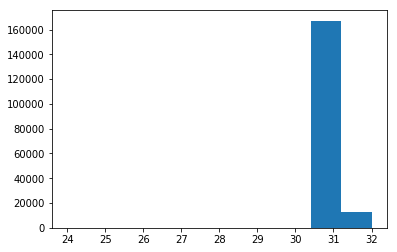

In [113]:
plt.hist([len(x) for x in lines])
plt.show()

In [155]:
with open("../data/ES/ES3_R1_pairs.txt") as f:
    pairs = [x[:-2].split(' ') for x in f.readlines()]

In [156]:
len(pairs)

74627

In [136]:
set_31 = [x[:31] for x in  K_1 + K_2]

In [160]:
set_31 = set(ans_3_31)

In [161]:
counter = 0

for l in lines + lines_2:
    if l in set_31:
    
        counter += 1

In [162]:
counter

283490

In [163]:
len(ans_3_31)

35